<a href="https://colab.research.google.com/github/commitit/Stock-Prediction/blob/main/AI_Stock_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Project : Predict the stock price movement of IBM.

We are using the stock data for IBM from the year 1962 to 2020 and try to predict the closing price for the date... to date..


Closing Price is the last price at which a stock trades during a regular trading session.




Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# processing libraries
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

# For time stamps
import datetime


##Read and explore the data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/commitit/Stock-Prediction/main/IBM.csv")

# We take a look at the first 10 rows of our dataset
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,7.713333,7.713333,7.626667,7.626667,0.618153,387200
1,1962-01-03,7.626667,7.693333,7.626667,7.693333,0.623556,288000
2,1962-01-04,7.693333,7.693333,7.613333,7.616667,0.617343,256000
3,1962-01-05,7.606667,7.606667,7.453333,7.466667,0.605185,363200
4,1962-01-08,7.460000,7.460000,7.266667,7.326667,0.593837,544000
5,1962-01-09,7.360000,7.506667,7.360000,7.413333,0.600862,491200
6,1962-01-10,7.426667,7.460000,7.426667,7.426667,0.601942,299200
7,1962-01-11,7.446667,7.506667,7.446667,7.506667,0.608427,315200
8,1962-01-12,7.520000,7.573333,7.520000,7.520000,0.609508,435200
9,1962-01-15,7.546667,7.570000,7.546667,7.553333,0.612209,251200


In [5]:
# We take a look at the last rows of our dataset
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
14658,2020-03-26,106.910004,113.150002,105.570000,112.889999,112.889999,7153500
14659,2020-03-27,108.580002,111.500000,107.650002,108.029999,108.029999,6423000
14660,2020-03-30,108.089996,113.459999,107.809998,112.930000,112.930000,5564500
14661,2020-03-31,112.000000,113.809998,110.169998,110.930000,110.930000,6343300
14662,2020-04-01,106.360001,109.919998,104.519997,105.139999,105.139999,6111900


In [3]:
#Check datatype, null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14663 entries, 0 to 14662
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14663 non-null  object 
 1   Open       14663 non-null  float64
 2   High       14663 non-null  float64
 3   Low        14663 non-null  float64
 4   Close      14663 non-null  float64
 5   Adj Close  14663 non-null  float64
 6   Volume     14663 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 802.0+ KB


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,14663.000000,14663.000000,14663.000000,14663.000000,14663.000000,1.466300e+04
mean,60.120629,60.677400,59.593508,60.140033,39.328815,4.864190e+06
std,57.326866,57.789666,56.897399,57.353260,50.095679,4.488682e+06
min,4.080000,4.286667,4.000000,4.080000,0.330787,0.000000e+00
25%,16.109375,16.215625,15.985938,16.110937,1.638967,1.320000e+06
50%,28.687500,28.875000,28.406250,28.656250,7.152684,4.102700e+06
75%,102.260002,103.825001,100.829998,102.311249,68.759914,6.851300e+06
max,215.380005,215.899994,214.300003,215.800003,165.514679,6.944470e+07


### Data visualisation

Plot the closing price

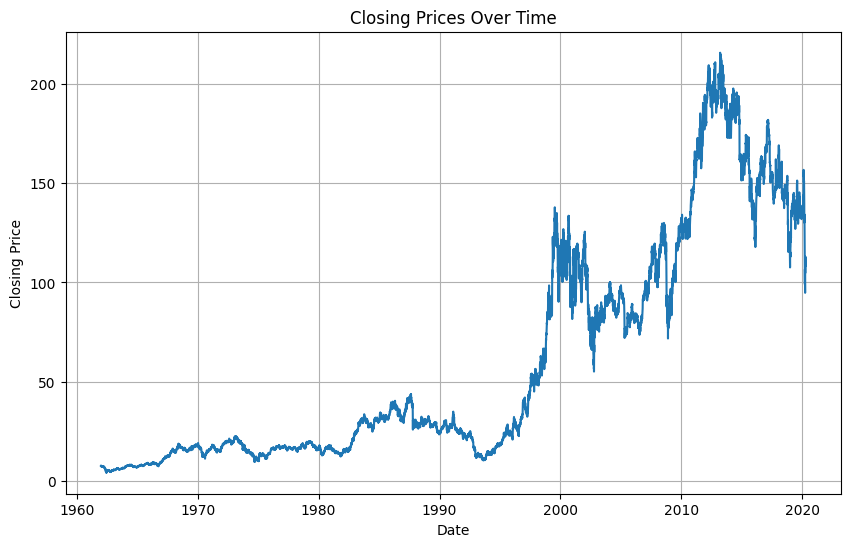

In [6]:
#Convert "Date" column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

#Visualize
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'])
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

Plot the volume of Sales

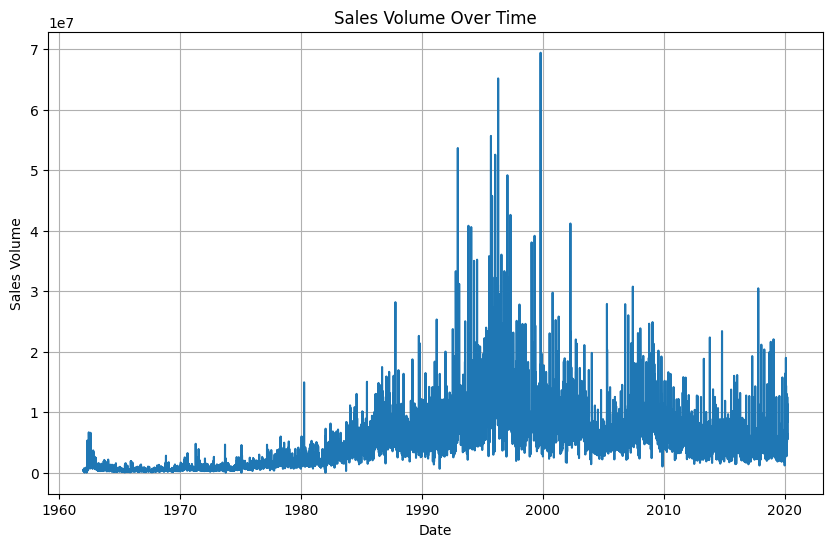

In [7]:
#Visualize
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Volume'])
plt.title('Sales Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.grid(True)
plt.show()

In [ ]:
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values

Import MinMaxScaler from scikit-learn to scale our dataset into numbers between 0 and 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

We want our data to be in the form of a 3D array for our LSTM model. First, we create data in 60 timesteps and convert it into an array using NumPy. Then, we convert the data into a 3D array with X_train samples, 60 timestamps, and one feature at each step.

In [ ]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

Make the necessary imports from keras

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

Add LSTM layer along with dropout layers to prevent overfitting. After that, we add a Dense layer that specifies a one unit output. Next, we compile the model using the adam optimizer and set the loss as the mean_squarred_error

In [ ]:
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1975/1975 [==============================] - 16s 8ms/step - loss: 0.0142
Epoch 2/100
1975/1975 [==============================] - 13s 6ms/step - loss: 0.0032
Epoch 3/100
1975/1975 [==============================] - 13s 6ms/step - loss: 0.0031
Epoch 4/100
1975/1975 [==============================] - 13s 7ms/step - loss: 0.0024
Epoch 5/100
1975/1975 [==============================] - 12s 6ms/step - loss: 0.0026
Epoch 6/100
1975/1975 [==============================] - 12s 6ms/step - loss: 0.0023
Epoch 7/100
1975/1975 [==============================] - 12s 6ms/step - loss: 0.0020
Epoch 8/100
1975/1975 [==============================] - 12s 6ms/step - loss: 0.0019
Epoch 9/100
1975/1975 [==============================] - 12s 6ms/step - loss: 0.0024
Epoch 10/100
1975/1975 [==============================] - 12s 6ms/step - loss: 0.0020
Epoch 11/100
1975/1975 [==============================] - 12s 6ms/step - loss: 0.0020
Epoch 12/100
1975/1975 [==============================] - 12s 6

Import the test set for the model to make predictions on

In [ ]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values

Before predicting future stock prices, we have to manipulate the training set; we merge the training set and the test set on the 0 axis, set the time step to 60, use minmaxscaler, and reshape the dataset as done previously. After making predictions, we use inverse_transform to get back the stock prices in normal readable format.


In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Plot our predicted stock prices and the actual stock price

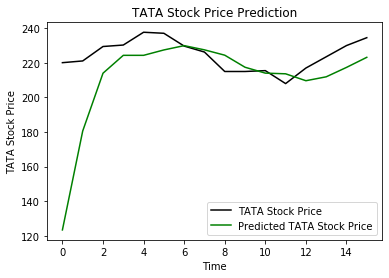

In [ ]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()